## Template para uso de framework (scikit-learn)
En términos generales, debemos seguir los siguientes pasos:
1. Importar módulos
2. Cargar datos
3. Separar datos en subconjuntos
4. Entrenar el modelo
5. Analizar su desempeño
6. Usar el modelo para nuevas estimaciones (datos no vistos)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Error cuadrático medio (Entrenamiento): 33.248211232490156
Error cuadrático medio (Validación): 42.222280000001014
Error cuadrático medio (Prueba): 89.71403952124861


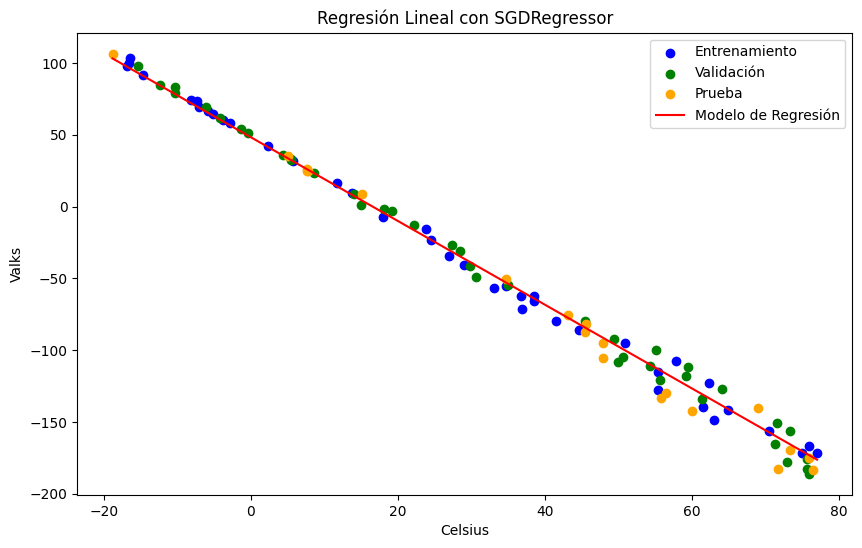

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Cargar datos
df = pd.read_csv('/content/Valhalla23.csv')

# Definir la semilla
seed = 8015

# Dividir el set de datos
df_train, df_temp = train_test_split(df, test_size=0.6, random_state=seed)
df_val, df_test = train_test_split(df_temp, test_size=1/3, random_state=seed)

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(df_train[['Celsius']])
X_val_scaled = scaler.transform(df_val[['Celsius']])
X_test_scaled = scaler.transform(df_test[['Celsius']])

# Crear el objeto del modelo con los parámetros indicados
model = linear_model.SGDRegressor(eta0=0.0004, max_iter=300000, random_state=seed)

# Ajustar el modelo a los datos escalados de entrenamiento
model.fit(X_train_scaled, df_train[['Valks']])

# Realizar predicciones en cada conjunto de datos
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calcular el error cuadrático medio para cada conjunto
mse_train = metrics.mean_squared_error(df_train[['Valks']], y_train_pred)
mse_val = metrics.mean_squared_error(df_val[['Valks']], y_val_pred)
mse_test = metrics.mean_squared_error(df_test[['Valks']], y_test_pred)

print("Error cuadrático medio (Entrenamiento):", mse_train)
print("Error cuadrático medio (Validación):", mse_val)
print("Error cuadrático medio (Prueba):", mse_test)

# Graficar los datos y la línea de regresión
plt.figure(figsize=(10, 6))

# Datos de entrenamiento
plt.scatter(df_train[['Celsius']], df_train[['Valks']], color='blue', label='Entrenamiento')

# Datos de validación
plt.scatter(df_val[['Celsius']], df_val[['Valks']], color='green', label='Validación')

# Datos de prueba
plt.scatter(df_test[['Celsius']], df_test[['Valks']], color='orange', label='Prueba')

# Graficar la línea de regresión
x_range = np.linspace(df[['Celsius']].min(), df[['Celsius']].max(), 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)
y_range = model.predict(x_range_scaled)
plt.plot(x_range, y_range, color='red', label='Modelo de Regresión')

# Etiquetas y leyenda
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.legend()
plt.title('Regresión Lineal con SGDRegressor')
plt.show()


Crea una lista que contenga 20 elementos (enteros) entre 2 y 39 (sin repetición, y que incluyan el número 2). Estos valores representarán la cantidad de instancias que se usarán para el análisis

Para cada uno de los tamaños del punto anterior, entrena 100 modelos usando un subconjunto aleatorio del set de entrenamiento que contenga esa cantidad de muestras. Por ejemplo, para el tamaño de 2 muestras, se deben entrenar 100 modelos utilizando 2 muestras seleccionadas aleatoriamente de las 40 muestras disponibles en el set de entrenamiento

Para cada uno de los modelos del punto anterior, calcula el error cuadrático medio en el subconjunto de entrenamiento (el que tiene un número cambiante de muestras), y en el subconjunto de validación

Haz una gráfica donde se muestre la evolución del error promedio de entrenamiento y validación, para cada uno de los diferentes tamaños de entrenamiento



[2, 3, 5, 6, 7, 8, 12, 14, 17, 18, 20, 21, 24, 26, 28, 30, 31, 35, 36, 37]
    size  mse_train_mean  mse_val_mean  mse_train_std   mse_val_std
0      2       23.896278     78.518937   1.065814e-14  0.000000e+00
1      3       21.834161     85.129619   3.552714e-15  2.842171e-14
2      5       61.277290     82.045423   2.842171e-14  1.421085e-14
3      6       52.041666     42.072665   1.421085e-14  0.000000e+00
4      7       55.549227     42.093543   7.105427e-15  0.000000e+00
5      8       52.517904     47.476240   1.421085e-14  1.421085e-14
6     12       42.809387     55.092785   1.421085e-14  7.105427e-15
7     14       36.432346     50.644511   0.000000e+00  7.105427e-15
8     17       30.819223     46.358943   7.105427e-15  0.000000e+00
9     18       28.989762     44.972922   7.105427e-15  7.105427e-15
10    20       26.997395     46.397289   3.552714e-15  7.105427e-15
11    21       28.088938     48.386569   7.105427e-15  0.000000e+00
12    24       24.386485     46.105623   

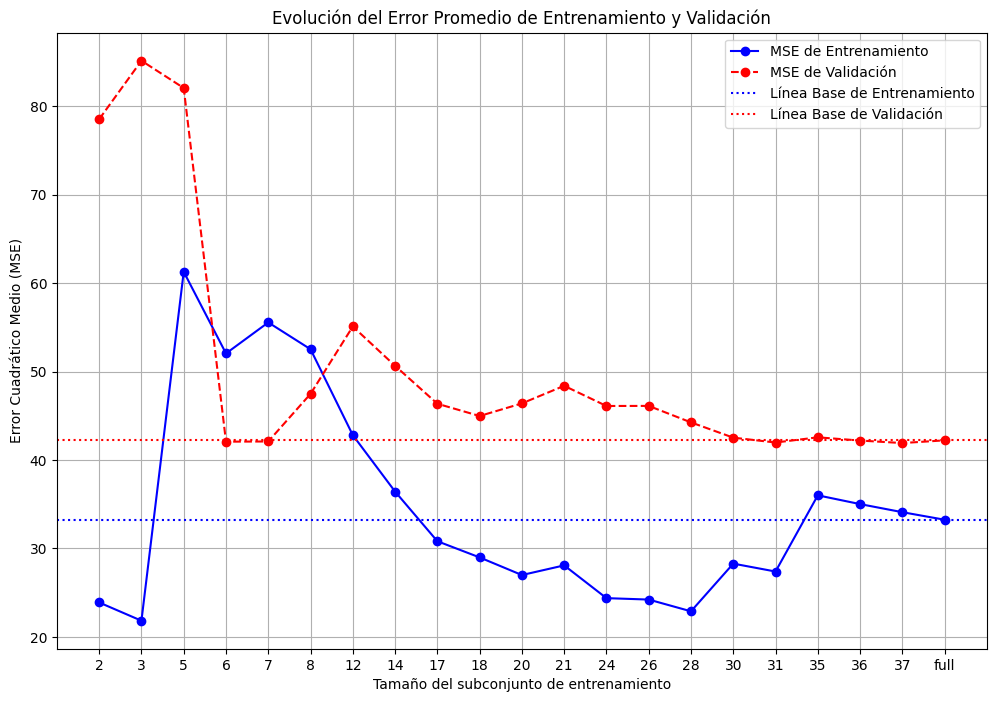

In [45]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

# Cargar el conjunto de datos
df = pd.read_csv('/content/Valhalla23.csv')

# Definir la semilla
seed = 8015

# Dividir el conjunto de datos
df_train, df_temp = train_test_split(df, test_size=0.6, random_state=seed)
df_val, df_test = train_test_split(df_temp, test_size=1/3, random_state=seed)

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(df_train[['Celsius']])
X_val_scaled = scaler.transform(df_val[['Celsius']])


# Generar una lista de números entre 3 y 39
possible_sizes = list(range(3, 40))

# Seleccionar 19 números aleatorios del rango 3-39
selected_sizes = random.sample(possible_sizes, 19)

# Añadir el número 2 a la lista
sizes = [2] + selected_sizes

# Asegurar que la lista tiene exactamente 20 tamaños únicos
sizes = sorted(set(sizes))

# Imprimir la lista final de tamaños
print(sizes)

# Almacenar resultados
results = []

# Entrenar modelos para cada tamaño de subconjunto
for size in sizes:
    mse_train_list = []
    mse_val_list = []

    for _ in range(100):
        # Seleccionar aleatoriamente un subconjunto de entrenamiento
        subset_train = df_train.sample(n=size, random_state=seed)  # Usar una semilla diferente para cada muestra
        subset_train_scaled = scaler.transform(subset_train[['Celsius']])

        # Crear y ajustar el modelo
        model = linear_model.SGDRegressor(eta0=0.0004, max_iter=300000, random_state=seed)
        model.fit(subset_train_scaled, subset_train['Valks'])

        # Realizar predicciones
        y_train_pred = model.predict(subset_train_scaled)
        y_val_pred = model.predict(X_val_scaled)

        # Calcular el MSE
        mse_train = metrics.mean_squared_error(subset_train['Valks'], y_train_pred)
        mse_val = metrics.mean_squared_error(df_val['Valks'], y_val_pred)

        mse_train_list.append(mse_train)
        mse_val_list.append(mse_val)

    # Almacenar los resultados para el tamaño actual
    results.append({
        'size': size,
        'mse_train_mean': np.mean(mse_train_list),
        'mse_val_mean': np.mean(mse_val_list),
        'mse_train_std': np.std(mse_train_list),
        'mse_val_std': np.std(mse_val_list)
    })

# Calcular errores de entrenamiento y validación de la línea base usando todo el conjunto de entrenamiento
model_full = linear_model.SGDRegressor(eta0=0.0004, max_iter=300000, random_state=seed)
model_full.fit(X_train_scaled, df_train['Valks'])

y_train_pred_full = model_full.predict(X_train_scaled)
y_val_pred_full = model_full.predict(X_val_scaled)

mse_train_full = metrics.mean_squared_error(df_train['Valks'], y_train_pred_full)
mse_val_full = metrics.mean_squared_error(df_val['Valks'], y_val_pred_full)

# Agregar los errores de la línea base a los resultados
results.append({
    'size': 'full',
    'mse_train_mean': mse_train_full,
    'mse_val_mean': mse_val_full,
    'mse_train_std': np.nan,
    'mse_val_std': np.nan
})

# Convertir los resultados a un DataFrame para una visualización más fácil
results_df = pd.DataFrame(results)

# Generar las listas de MSE promedios
mse_train_means = results_df['mse_train_mean'].tolist()
mse_val_means = results_df['mse_val_mean'].tolist()
sizes_with_base = results_df['size'].tolist()

# Imprimir los resultados
print(results_df)


plt.figure(figsize=(12, 8))

# Graficar el MSE de entrenamiento
plt.plot(sizes_with_base, mse_train_means, linestyle='-', color='b', label='MSE de Entrenamiento')

# Graficar el MSE de validación
plt.plot(sizes_with_base, mse_val_means, linestyle='--', color='r', label='MSE de Validación')

# Añadir el punto de la línea base
plt.axhline(y=mse_train_full, color='b', linestyle=':', label='Línea Base de Entrenamiento')
plt.axhline(y=mse_val_full, color='r', linestyle=':', label='Línea Base de Validación')

# Etiquetas y título
plt.xlabel('Tamaño del subconjunto de entrenamiento')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Evolución del Error Promedio de Entrenamiento y Validación')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


Con base en la grafica anterior, explica el tipo de ajuste obtenido para el primer modelo (el entrenado sobre 2 muestras) y para el modelo final (el entrenado sobre 40 muestras).

También explica como cambia el tipo de ajuste a medida que se incrementa el número de muestras del entrenamiento. Incluye también en tu análisis el grado de sesgo y de varianza para los diferentes modelos.

Con base en la gráfica y los datos, identifica la cantidad de muestras más adecuada para realizar el entrenamiento. Justifica tu selección.


El módulo número uno, muestra un gran sobreajuste de los datos, acompañado de un alto error de validación, lo cual nos indica que realmente no está funcionando como deberia, obteniendo información irrelevante en vez de los patrones buscados, el modelo número dos, muestra tener un mejor ajuste, con mejores valores de error, lo cual indica un mejor resultado de los datos y patrones

La razón del por que al incrementar las muestras de entrenamiento, el modelo pasa de tener un gran sobreajuste a un estado más equilibrado, es debido a que tiene más información de la que poder tomar decisiones, este cambio es de vital importancia para que sea correcto y funcional.

Al analizar las gráficas y los datos obtenidos anteriormente, podemos juzgar que 40 muestras son la cantidad más adecuada para realizar el entrenamiento, debido a que este tamaño reduce el error mientras que mantiene un margen de error en el entrenamiento razonable,lo que indica un buen equilibrio entre ajuste y generalización.


Entrena un nuevo modelo utilizando esa cantidad de muestras, y calcula su error cuadrático medio sobre el subconjunto de entrenamiento (el de la cantidad de muestras seleccionadas), el de validación, y el de prueba.

In [38]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

# Cargar el conjunto de datos
df = pd.read_csv('/content/Valhalla23.csv')

# Definir la semilla
seed = 8015

# Dividir el conjunto de datos
df_train, df_temp = train_test_split(df, test_size=0.6, random_state=seed)
df_val, df_test = train_test_split(df_temp, test_size=1/3, random_state=seed)

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(df_train[['Celsius']])
X_val_scaled = scaler.transform(df_val[['Celsius']])
X_test_scaled = scaler.transform(df_test[['Celsius']])

# Definir el tamaño del subconjunto
subset_size = 40  # Cambia este valor según el tamaño deseado

# Seleccionar aleatoriamente un subconjunto de entrenamiento
subset_train = df_train.sample(n=subset_size, random_state=seed)
subset_train_scaled = scaler.transform(subset_train[['Celsius']])

# Crear y ajustar el modelo
model_new = linear_model.SGDRegressor(eta0=0.0004, max_iter=300000, random_state=seed)
model_new.fit(subset_train_scaled, subset_train['Valks'])

# Realizar predicciones
y_train_pred_new = model_new.predict(subset_train_scaled)
y_val_pred_new = model_new.predict(X_val_scaled)
y_test_pred_new = model_new.predict(X_test_scaled)

# Calcular el MSE
mse_train_new = metrics.mean_squared_error(subset_train['Valks'], y_train_pred_new)
mse_val_new = metrics.mean_squared_error(df_val['Valks'], y_val_pred_new)
mse_test_new = metrics.mean_squared_error(df_test['Valks'], y_test_pred_new)

# Imprimir los resultados
print(f'MSE en el subconjunto de entrenamiento ({subset_size} muestras): {mse_train_new}')
print(f'MSE en el conjunto de validación: {mse_val_new}')
print(f'MSE en el conjunto de prueba: {mse_test_new}')


MSE en el subconjunto de entrenamiento (40 muestras): 33.24393571495418
MSE en el conjunto de validación: 42.219691025710326
MSE en el conjunto de prueba: 89.68894896604763


Compara los valores del punto anterior contra los errores obtenidos para la línea base (ver punto 5)
Argumenta cuál configuración funcionó mejor, y por qué



Ambos modelos muestran un rendimiento casi idéntico en términos de MSE para los subconjuntos de entrenamiento, validación y prueba. Sin embargo, el modelo entrenado con 40 muestras seleccionadas tiene una ligera ventaja en el conjunto de prueba, lo que sugiere que podría ser un poco más efectivo para generalizar datos completamente nuevos. Dado que la diferencia en el error es mínima, cualquiera de las configuraciones podría considerarse adecuada, pero la ligera ventaja en el conjunto de prueba podría inclinar la balanza a favor del modelo con 40 muestras, especialmente si se busca optimizar la capacidad de generalización.
